## The problem of overfitting and regularization

### An overfitting model

Iteration      0: Cost = 102.78277
Iteration  20000: Cost = 3.13866
Iteration  40000: Cost = 1.12338
Iteration  60000: Cost = 0.40208
Iteration  80000: Cost = 0.14391
Iteration 100000: Cost = 0.05151
Iteration 120000: Cost = 0.01844
Iteration 140000: Cost = 0.00660
Iteration 160000: Cost = 0.00236
Iteration 180000: Cost = 0.00085
w = [-111.01385551  445.42444172  -26.58199697 -240.70542065 -186.78253919
   -2.75146685  216.14908968], b = 10.422283704887308


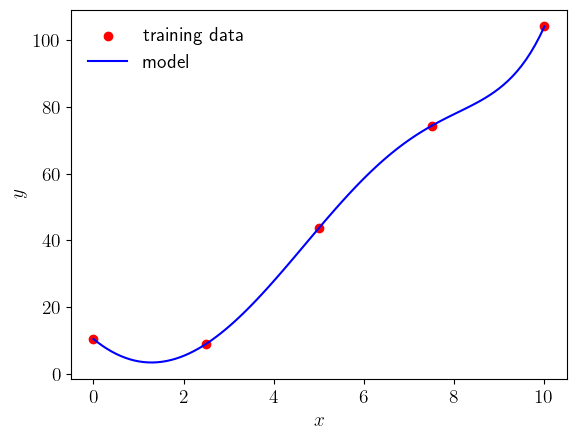

In [89]:
%run ../../src.ipynb
%run ../../utils.ipynb

x = np.linspace(0,10,5)
y = np.power(x,2)+1+30*np.random.rand(x.size)
x = np.reshape(x,(-1,1))

# feature scaling
# mu = np.mean(x, axis=0)
# sigma = np.std(x, axis=0)

# xScaled = (x-mu)/sigma

maxVal = x.max(0)
minVal = x.min(0)
xScaled = (x-minVal)/(maxVal-minVal)# between 0 and 1

N = 7 # high order to induce overfitting
xScaledMapped = feature_mapping(xScaled,N)

m, n = xScaledMapped.shape;
w0 = np.zeros(n)
w0[1] = 2
b0 = 1
alpha = 5e-1
numberIterations = 200000

w,b,J = gradient_descent(xScaledMapped,y,w0,b0,alpha,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

def predictPLOT(x,xScaled,N,w,b):
    xTest = np.linspace(x[0],x[-1],100)
    xTestScaled = np.linspace(xScaled[0],xScaled[-1],100)
    xTestMapped = feature_mapping(xTestScaled,N)
    yhat = prediction_linear_regression(w,b,xTestMapped)
    plt.scatter(x,y,marker='o',c='r',label='training data')
    plt.plot(xTest,yhat,'-b',label='model')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend(frameon=False)
    

predictPLOT(x,xScaled,N,w,b)
plt.show()

### Regularization

Iteration      0: Cost = 155.48850
Iteration   2000: Cost = 126.84741
Iteration   4000: Cost = 126.84741
Iteration   6000: Cost = 126.84741
Iteration   8000: Cost = 126.84741
Iteration  10000: Cost = 126.84741
Iteration  12000: Cost = 126.84741
Iteration  14000: Cost = 126.84741
Iteration  16000: Cost = 126.84741
Iteration  18000: Cost = 126.84741
w = [22.8566613  19.38024033 14.70543946 10.90387661  8.08954347  6.04335562
  4.55253138], b = 17.487866441438307


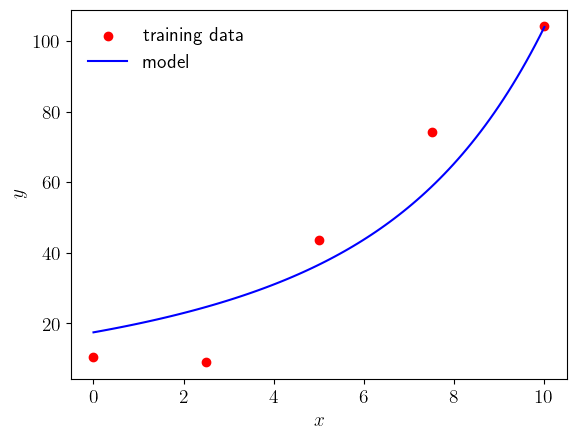

In [91]:
lambda_ = 0.5
numberIterations = 20000
w,b,J = gradient_descent_regularization(xScaledMapped,y,w0,b0,alpha,lambda_,numberIterations,linear_regression_cost,linear_regression_gradient);
print(f"w = {w}, b = {b}")

predictPLOT(x,xScaled,N,w,b)
plt.show()